In [1]:
import category_encoders as ce
import datetime
import graphviz
import itertools
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_profiling as pdp
import platform
import socket
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.arima_model import ARMA, ARMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
sys.path.insert(0, '../util/')
from utils import *

In [2]:
df = sm.datasets.get_rdataset('Nile', cache=True).data
df.shape

(100, 2)

In [3]:
df.head()

,time,value
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


In [4]:
df.tail()

,time,value
95,1966,746
96,1967,919
97,1968,718
98,1969,714
99,1970,740


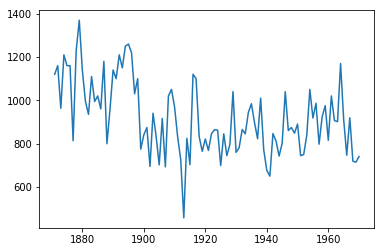

In [5]:
plt.plot(df.time, df.value)
plt.show()

In [6]:
#====================================================
# AR model
#====================================================

In [7]:
# train, testデータに分割
train = df["value"].iloc[:90]
test  = df["value"].iloc[90:]
train_xi = df["time"].iloc[:90]
test_xi = df["time"].iloc[90:]

In [8]:
# AR model
ar = AR(train).fit()

In [9]:
# predict
ar_predict = ar.predict(90, 100)

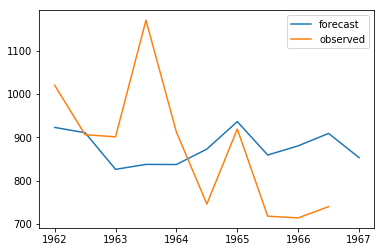

In [10]:
# plot
fig, ax = plt.subplots()
plt.plot(ar_predict, label="forecast")
plt.plot(test, label="observed")
ax.set_xticklabels(test_xi)
plt.legend()
plt.show()

In [11]:
# save
ar.save("../model/nile_ar.pkl")

In [12]:
#====================================================
# ARMA model
#====================================================

In [13]:
# ARMA model
arma03 = ARMA(train, (0,3)).fit()
arma23 = ARMA(train, (2,3)).fit()

In [14]:
# predict
arma03_predict = arma03.predict(90, 100)
arma23_predict = arma23.predict(90, 100)

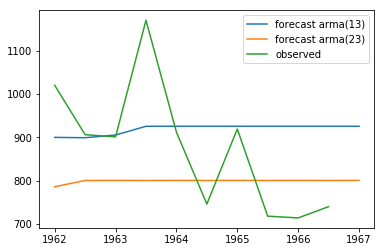

In [15]:
# plot
fig, ax = plt.subplots()
plt.plot(arma03_predict, label="forecast arma(13)")
plt.plot(arma23_predict, label="forecast arma(23)")
plt.plot(test, label="observed")
ax.set_xticklabels(test_xi)
plt.legend()
plt.show()

In [16]:
arma03.save("../model/nile_arma03.pkl")
arma23.save("../model/nile_arma23.pkl")

In [17]:
# load
a = ARResults.load("../model/nile_arma03.pkl")
a.aic

1162.3754861245186